# G12 | DMYTRO VERNYUK Y MIKHAIL RONCHYK

# Practica 1 - Parte 2: Clasificación

Para esta parte utilizaremos el dataset Breast Cancer, el cual describe tumores benignos y malignos junto a distintos parametros que los describen.

In [240]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [277]:
rand = 911 #Numero para los parametros aleatorios

cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names']) 
df['type'] = cancer['target']
dic_target = { 0 : 'malignant', 1 : 'benign'}
df['type'] = df['type'].map(dic_target)
df.head().transpose()

0          1          2          3          4
mean radius                  17.99      20.57      19.69      11.42      20.29
mean texture                 10.38      17.77      21.25      20.38      14.34
mean perimeter               122.8      132.9        130      77.58      135.1
mean area                     1001       1326       1203      386.1       1297
mean smoothness             0.1184    0.08474     0.1096     0.1425     0.1003
mean compactness            0.2776    0.07864     0.1599     0.2839     0.1328
mean concavity              0.3001     0.0869     0.1974     0.2414      0.198
mean concave points         0.1471    0.07017     0.1279     0.1052     0.1043
mean symmetry               0.2419     0.1812     0.2069     0.2597     0.1809
mean fractal dimension     0.07871    0.05667    0.05999    0.09744    0.05883
radius error                 1.095     0.5435     0.7456     0.4956     0.7572
texture error               0.9053     0.7339     0.7869      1.156     0.7813
perimeter error              8.589      3.398      4.585      3.445      5.438
area error                   153.4      74.08      94.03      27.23      94.44
smoothness error          0.006399   0.005225    0.00615    0.00911    0.01149
compactness error          0.04904    0.01308    0.04006    0.07458    0.02461
concavity error            0.05373     0.0186    0.03832    0.05661    0.05688
concave points error       0.01587     0.0134    0.02058    0.01867    0.01885
symmetry error             0.03003    0.01389     0.0225    0.05963    0.01756
fractal dimension error   0.006193   0.003532   0.004571   0.009208   0.005115
worst radius                 25.38      24.99      23.57      14.91      22.54
worst texture                17.33      23.41      25.53       26.5      16.67
worst perimeter              184.6      158.8      152.5      98.87      152.2
worst area                    2019       1956       1709      567.7       1575
worst smoothness            0.1622     0.1238     0.1444     0.2098     0.1374
worst compactness           0.6656     0.1866     0.4245     0.8663      0.205
worst concavity             0.7119     0.2416     0.4504     0.6869        0.4
worst concave points        0.2654      0.186      0.243     0.2575     0.1625
worst symmetry              0.4601      0.275     0.3613     0.6638     0.2364
worst fractal dimension     0.1189    0.08902    0.08758      0.173    0.07678
type                     malignant  malignant  malignant  malignant  malignant

In [274]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.400000   251.20000  
worst area               515.300000  686.500000  1084.

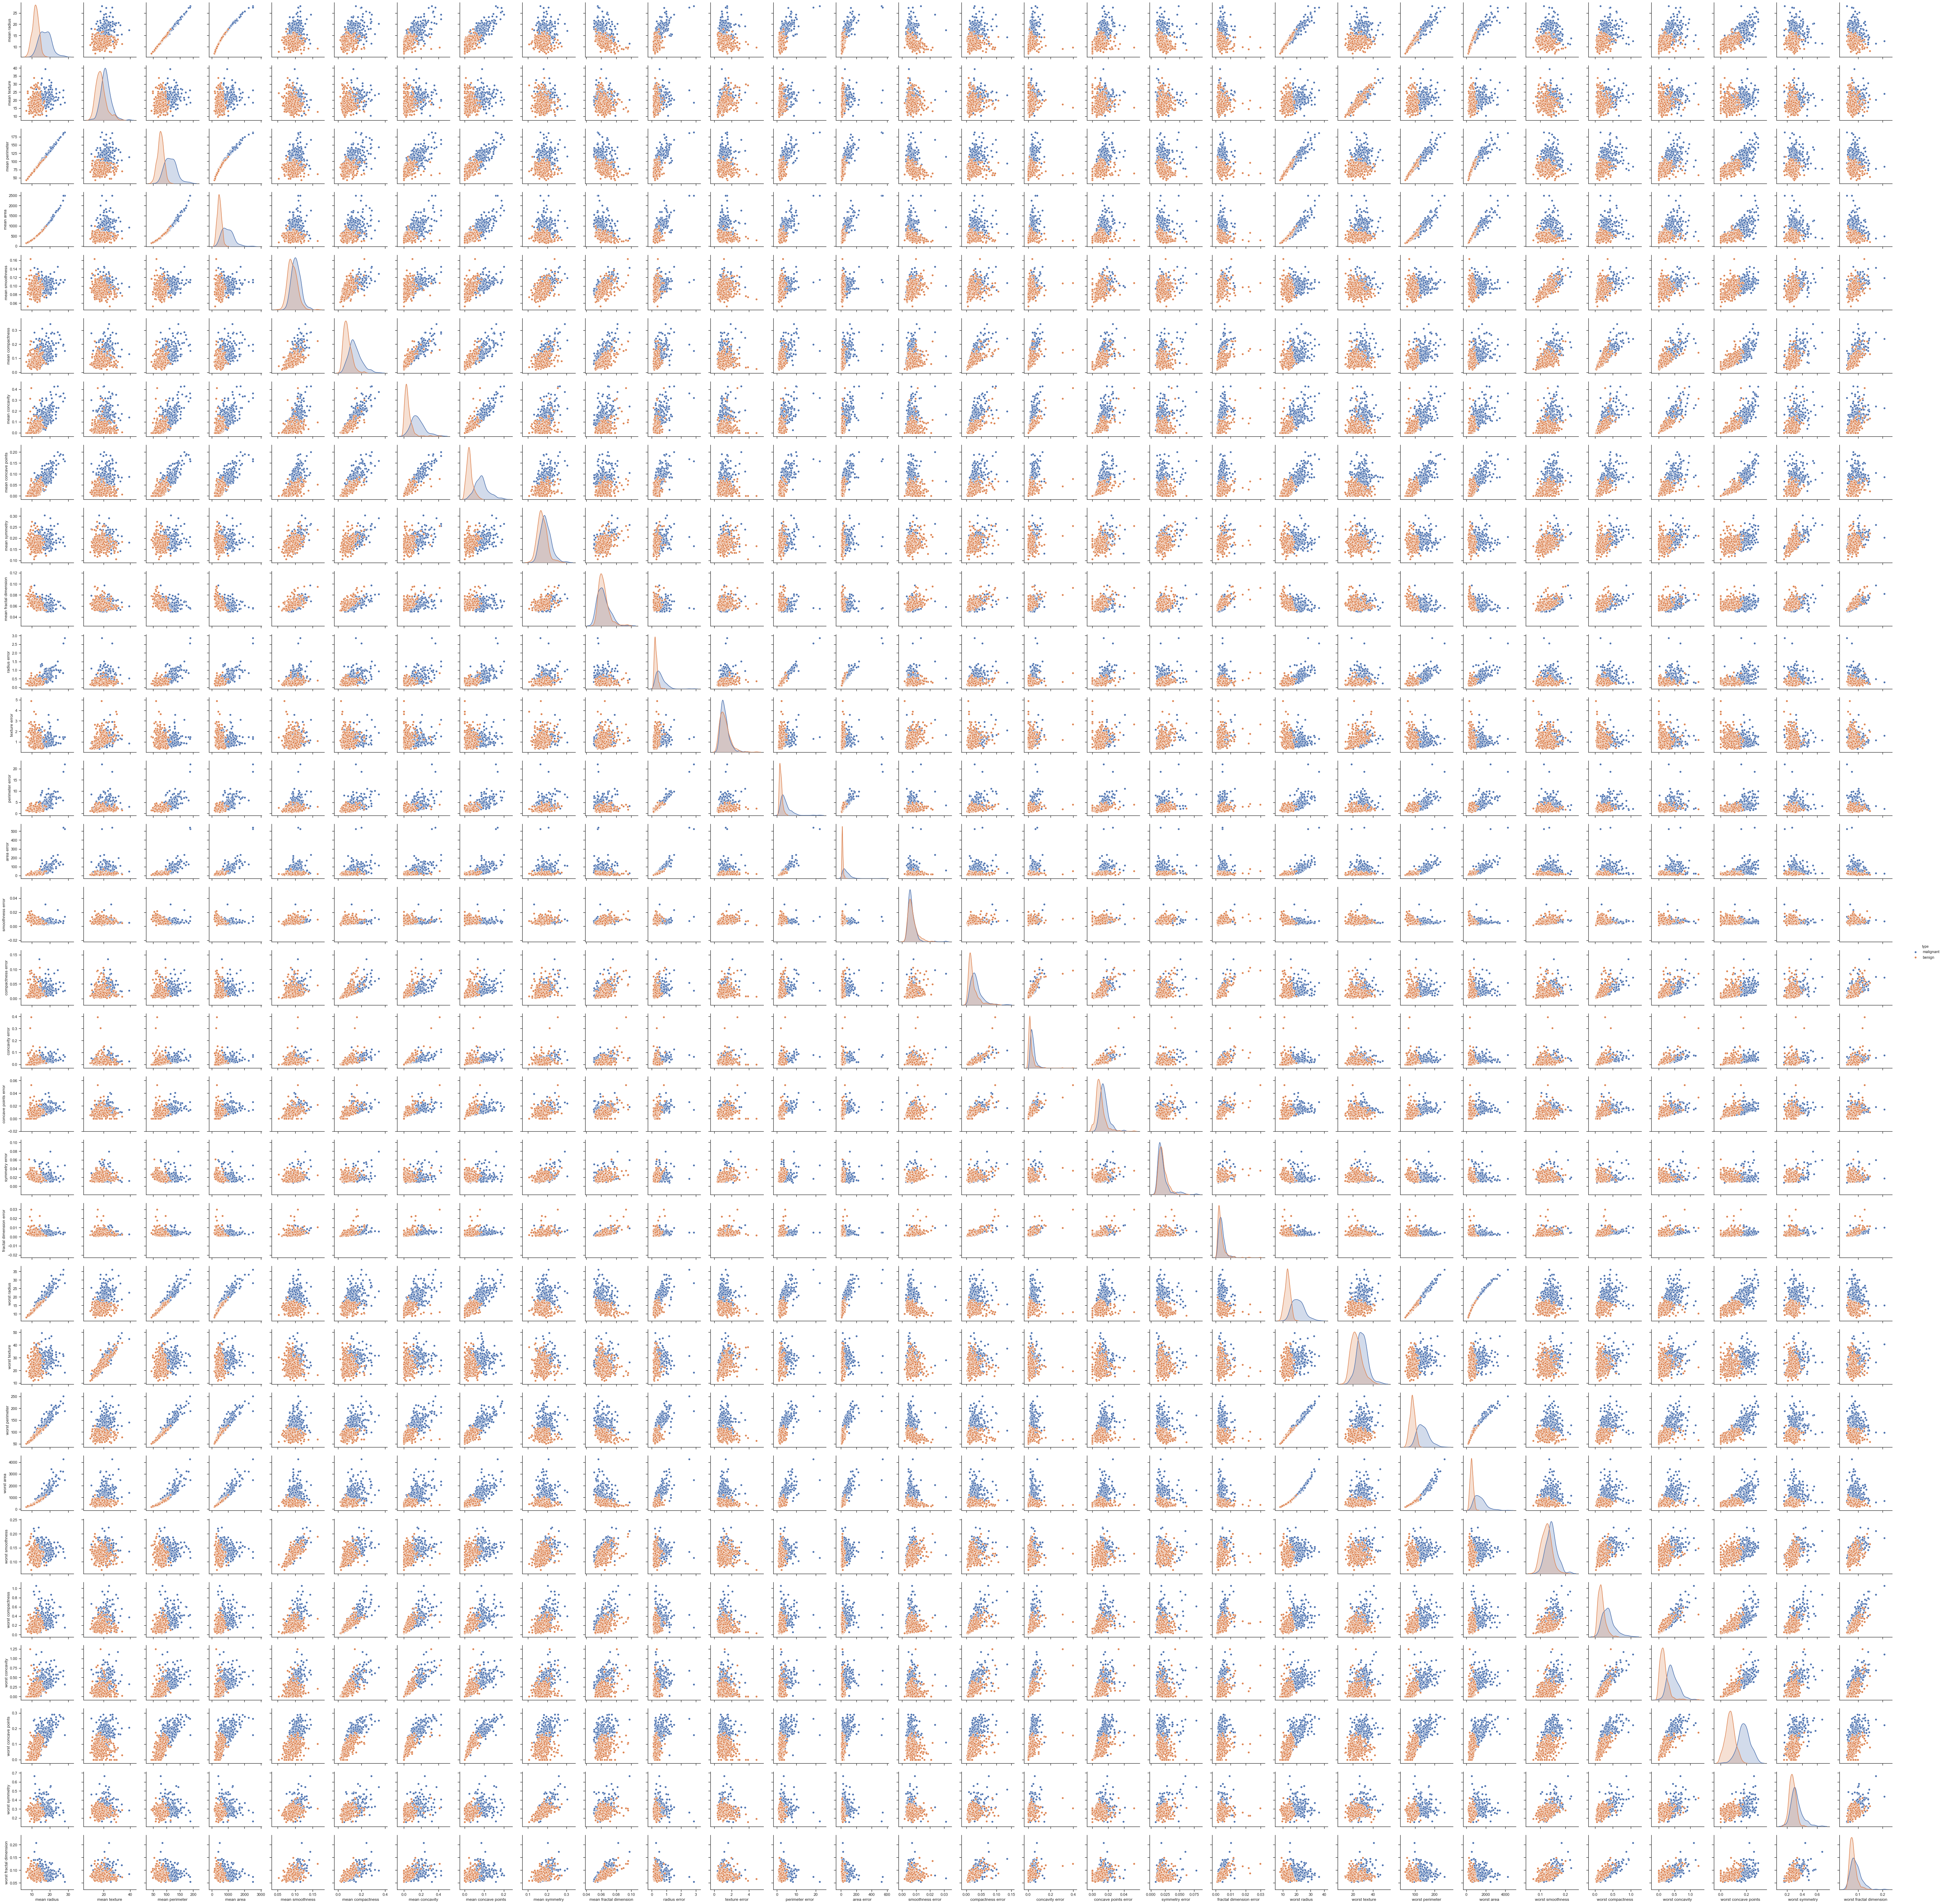

In [23]:
sns.set(style="ticks")
sns.pairplot(df, hue='type', vars=cancer['feature_names'])

Observamos que las variables de tipo Worst son las que, en general, mejor division entre los 2 clusters hacen.

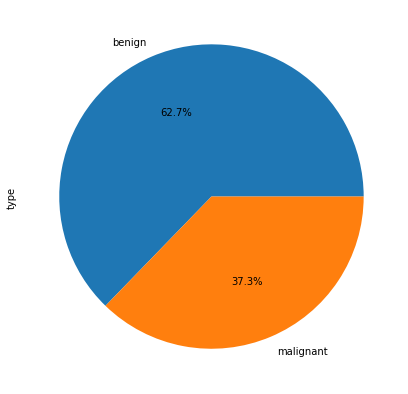

In [5]:
df['type'].value_counts().plot.pie(figsize=(7, 7), autopct = '%.1f%%')

El árbol de decisión no necetia escalar los datos para su correcto funcionamiento.

In [161]:
#Particion de datos
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.3, 
                                                    random_state=rand)

In [162]:
train_accuracy = []
test_accuracy = []

max_depths = range(1, 8)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, 
                                 min_samples_split=2)
    
    scores = cross_validate(clf, cancer.data, cancer.target, 
                            scoring='accuracy', cv=5, 
                            return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

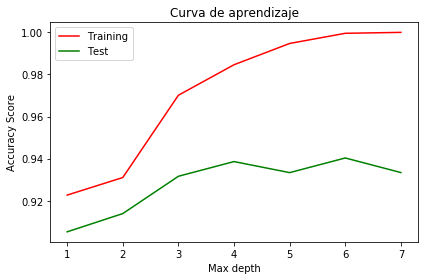

In [163]:
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Max depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Observamos que para Max depth los mejores valores para el test son 4 y 6. Elegimos el 4 como valor maximo de profundidad porque el nivel de sobreaprendizaje es significativamente menor que en el otro caso.

In [164]:
clf = DecisionTreeClassifier(criterion="entropy", 
                             max_depth=4,
                             min_samples_split=2)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9798994974874372, 0.9532163742690059)

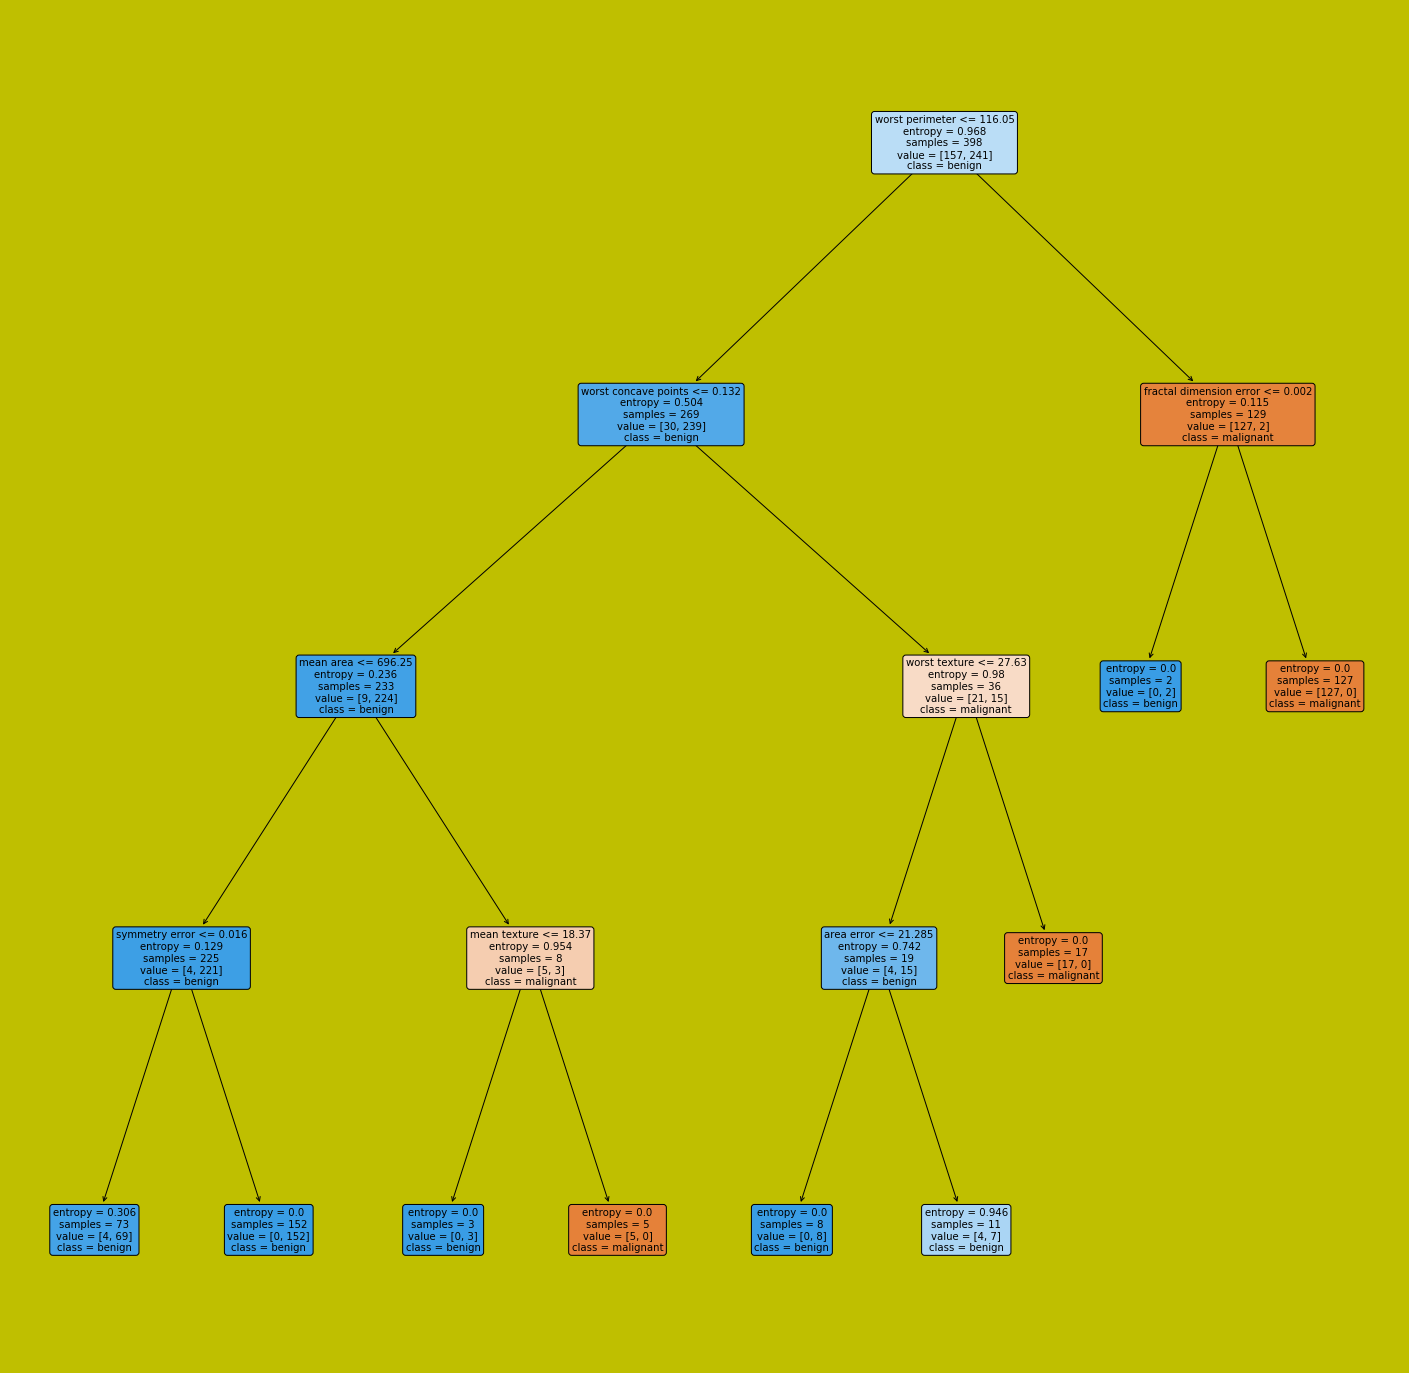

In [165]:
plt.figure(figsize=(25,25),facecolor='y') #facecolor='k'
plot_tree(clf, filled=True, feature_names=cancer.feature_names, 
          class_names=cancer.target_names, rounded=True)
plt.show()

-La clase que mejor se ha podido clasificar es el del cancer maligno. Como preguntamos por el peor caso de una variable sabemos rapidamente distinguir los más casos peligrosos.

-Worst texture, worst perimeter y worst concave points son las variables con mayor poder discriminante.

-No se han usado las variables radius, smoothness, compactness y concavity de ningun tipo.

-Los nodos con mayor confusión son el de la raiz y el de wort texture.

In [169]:
clf = DecisionTreeClassifier(criterion="entropy", 
                             max_depth=7,
                             min_samples_split=2)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.9415204678362573)

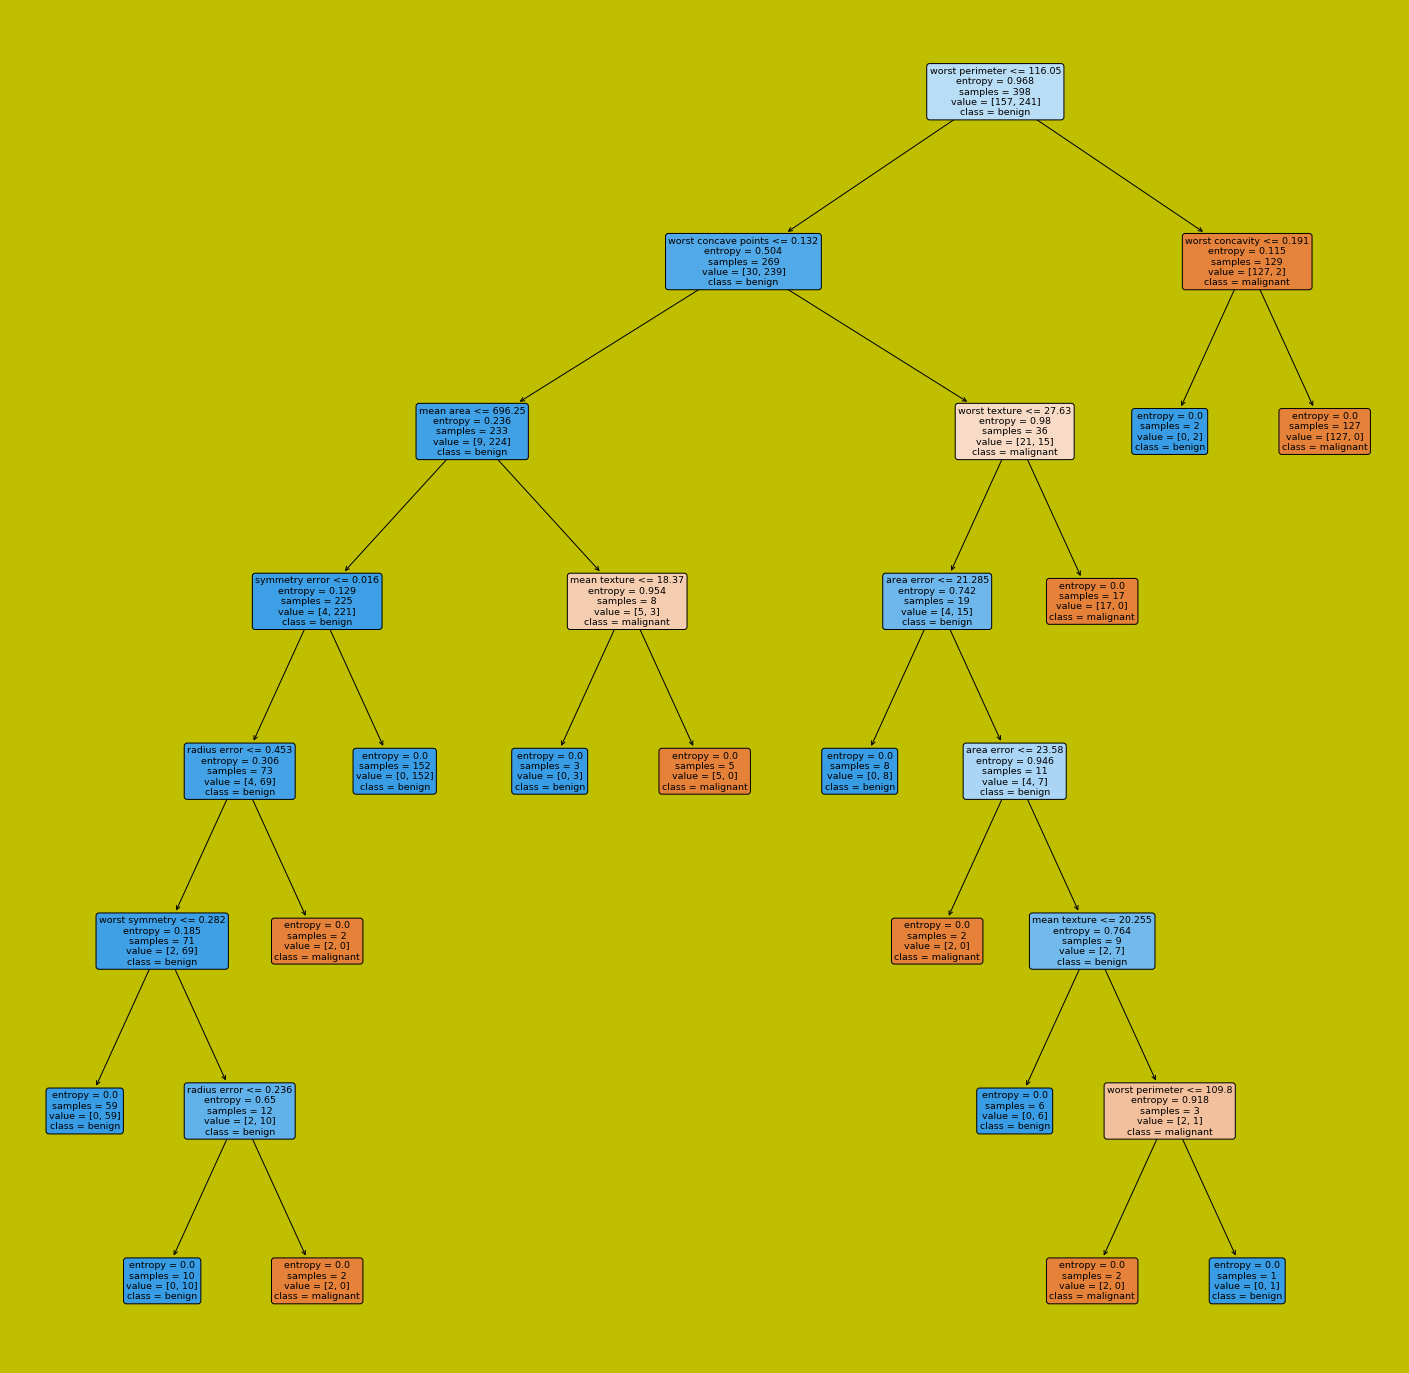

In [170]:
plt.figure(figsize=(25,25), facecolor='y')
plot_tree(clf, filled=True, feature_names=cancer.feature_names, 
          class_names=cancer.target_names, rounded=True)
plt.show()

-La clase que mejor se ha podido clasificar es el del cancer maligno. Como preguntamos por el peor caso de una variable sabemos rapidamente distinguir los más casos peligrosos.

-Worst texture, worst perimeter, worst concave points y area error son las variables con mayor poder discriminante.

-No se han usado las variables smoothness y compactness de ningun tipo.

-Los nodos con mayor confusión son el de la raiz y el de wort texture.

In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[0.89090909 0.10909091]
 [0.03448276 0.96551724]]


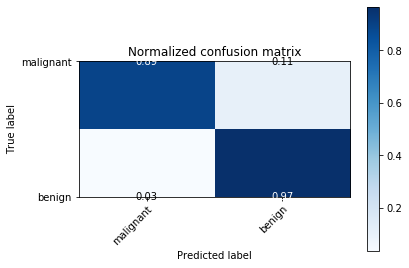

In [23]:
y_test_predicted =clf.predict(X_test)
plot_confusion_matrix(y_test, y_test_predicted, cancer.target_names,
                      normalize=True)

In [214]:
predictions = cross_val_predict(clf, cancer.data, cancer.target, cv=5)
cr=classification_report(cancer.target,predictions, 
                         target_names=cancer.target_names)
print(cr)

              precision    recall  f1-score   support

   malignant       0.93      0.87      0.90       212
      benign       0.93      0.96      0.95       357

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



# K-NN

El k-NN es sensible a la diferencia del rango de los datos, por eso estandarizamos nuestras observaciones.

In [281]:
scaler = StandardScaler()
scaler.fit(cancer.data)
df_scaled = pd.DataFrame(data=scaler.transform(cancer.data), 
                         columns=cancer['feature_names'])

Hemos elegido las 3 variables más impactantes que han salido del árbol de decisión creado anteriormente.

In [287]:
df_scaled = df_scaled.loc[:, ['worst texture','worst perimeter', 
                        'worst concave points']]

In [288]:
#Particion de datos
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, 
                                                    cancer.target, 
                                                    test_size=0.3, 
                                                    random_state=rand)

In [289]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    
    scores = cross_validate(clf, df_scaled.values, cancer.target, 
                            scoring='accuracy', cv=5)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

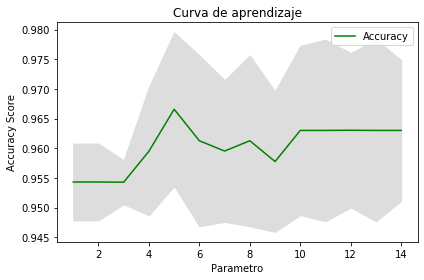

In [290]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

->Comparar con el arbol

In [292]:
valor_optimo=5 #Valor optimo sacada de la tabla de arriba

clf = KNeighborsClassifier(n_neighbors=valor_optimo, weights='distance')
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.9532163742690059)

Los resultados en el test son idénticos en los ambos metodos, pero elegimos el árbol porque su sobreaprendizaje es menor.

Árbol: (0.9798994974874372, 0.9532163742690059)

K-NN: (1.0000000000000000, 0.9532163742690059)